


---


#  **Tesla Stock Data Visualization**


---




**Team Members-**

Prikshit Kumar Verma- MB24045

Shikhin Sharma- MB24044

Ansh Gautam- MB24042


This dataset contains the historical stock prices for Tesla from January 2, 2020, to December 29, 2023. It includes records for around 1,457 days and consists of 996 rows and 8 columns. The columns featured in the dataset are 'Date', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adjusted Close'.

# **Importing Libraries**

In [71]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# implort plotly for interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

#import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# import warnings
import warnings
warnings.filterwarnings('ignore')

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Metrics
import math

%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

In [72]:
from google.colab import files
uploaded = files.upload()

Saving tesla_stock_data.csv to tesla_stock_data (3).csv


# **Loading Dataset**

In [73]:
df = pd.read_csv("tesla_stock_data.csv")

# Displaying the first few rows of the DataFrame
df
df.head()
print(df.columns)


Index(['Date', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


# **Summary Statistics**

Added the visual changes and removed the unwanted graphs

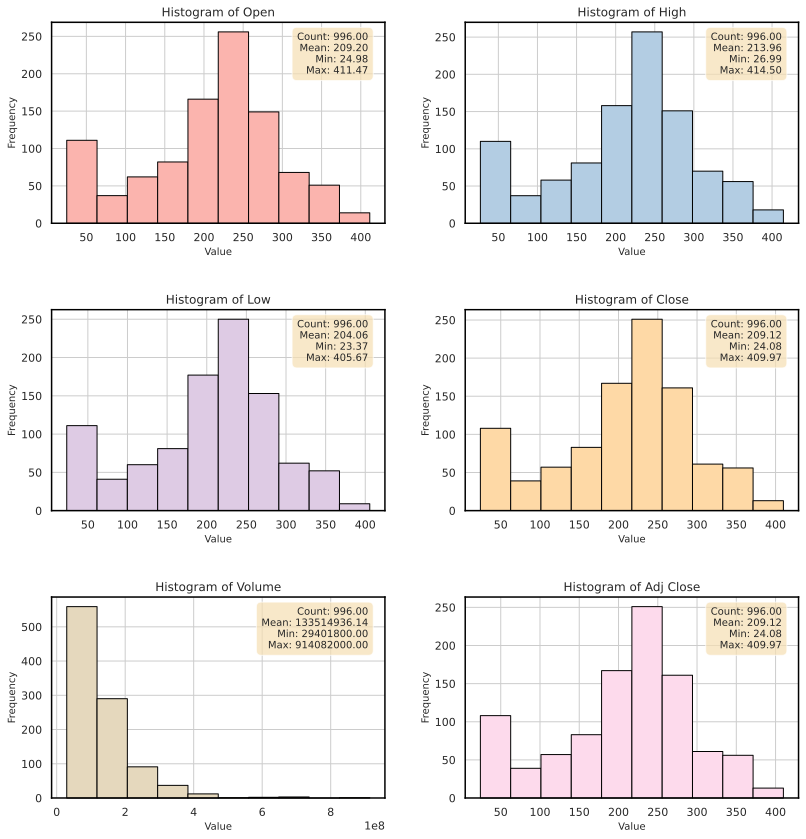

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


columns = df.drop('Date', axis=1).columns

n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

colors = plt.cm.Pastel1(np.linspace(0, 1, len(columns)))

for i, column in enumerate(columns[1:]):
    ax = axes[i]
    col_data = df[column]
    ax.hist(col_data, bins=10, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    summary = df[column].describe()
    summary_text = (
        f'Count: {summary["count"]:.2f}\n'
        f'Mean: {summary["mean"]:.2f}\n'
        f'Min: {summary["min"]:.2f}\n'
        f'Max: {summary["max"]:.2f}'
    )

    ax.text(0.95, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.7))

    # Add border to the subplot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

for i in range(len(columns[1:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=3.0)  # Adjust padding to avoid overlap
plt.show()


## **OUTLIERS:**

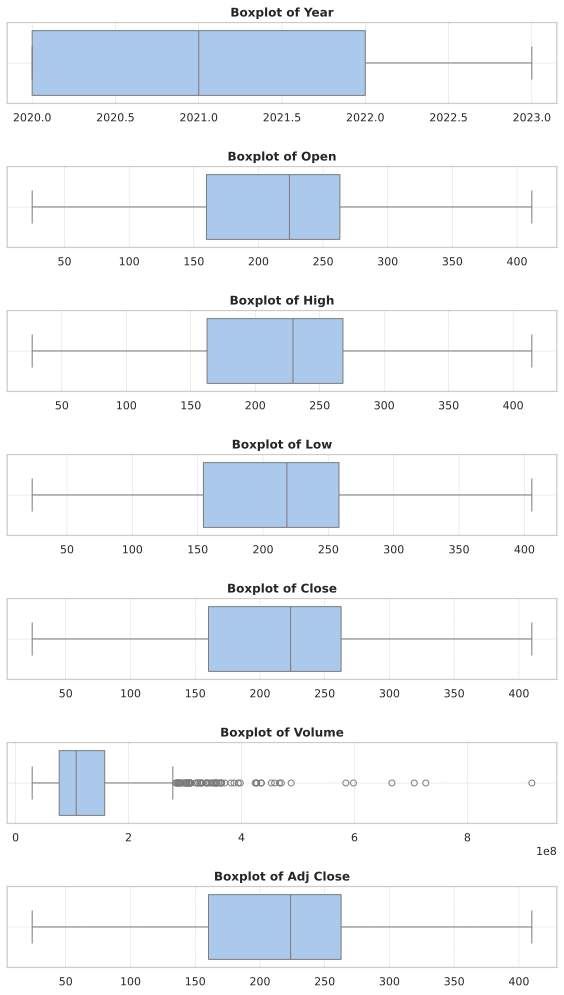

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns if needed (e.g., 'Date')
numeric_cols = df.drop(['Date'], axis=1)

# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), ncols=1, figsize=(8, len(numeric_cols.columns) * 2))

for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols, x=column, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Boxplot of {column}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')  # Remove the x-label
    axes[i].grid(True, linestyle='--', linewidth=0.5)

# Tight layout to reduce space between plots
plt.tight_layout()
plt.show()

In [77]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    return outliers

# Find outliers for each numeric column
numeric_cols = df.select_dtypes(include=[np.number])
outliers_dict = {column: find_outliers_iqr(numeric_cols[column]) for column in numeric_cols.columns}

# Print the outliers
for column, outliers in outliers_dict.items():
    print(f'Outliers in {column}:')
    print(outliers)
    print('Number of outliers:', outliers.shape[0])
    print()

Outliers in Year:
Series([], Name: Year, dtype: int64)
Number of outliers: 0

Outliers in Open:
Series([], Name: Open, dtype: float64)
Number of outliers: 0

Outliers in High:
Series([], Name: High, dtype: float64)
Number of outliers: 0

Outliers in Low:
Series([], Name: Low, dtype: float64)
Number of outliers: 0

Outliers in Close:
Series([], Name: Close, dtype: float64)
Number of outliers: 0

Outliers in Volume:
4      467164500
5      426606000
7      397764000
8      434943000
10     326050500
         ...    
180    328430400
182    285222600
183    289683300
242    666378600
765    306590600
Name: Volume, Length: 65, dtype: int64
Number of outliers: 65

Outliers in Adj Close:
Series([], Name: Adj Close, dtype: float64)
Number of outliers: 0



## **TIME FRAME OF THE DATASET:**

In [78]:
# Lets convert the Date column to datetime format
df['Date']=pd.to_datetime(df['Date'])
# Lets find the starting and ending date of the dataset
starting_date = df['Date'].min()
ending_date   = df['Date'].max()
# Lets check the Format of dates
starting_date_formatted = starting_date.strftime("%Y-%m-%d")
ending_date_formatted = ending_date.strftime("%Y-%m-%d")
# print the starting and ending date
print("Starting date is:", starting_date_formatted)
print("Ending date is:", ending_date_formatted)

Starting date is: 2020-01-02
Ending date is: 2023-12-29


In [79]:
# print(f"Total days in this dataset which represents the stock price are {df.Date.min()}{df.Date.max()}")
print(f"Total days in this dataset which represents the stock price are: {(df.Date.max()-df.Date.min()).days}days")

Total days in this dataset which represents the stock price are: 1457days


## **OPENING & CLOSING PRICE**

In [80]:
import pandas as pd
import plotly.graph_objects as go


fig = go.Figure()

# Add Open line in red
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Open'],
    mode='lines',
    name='Open',
    line=dict(color='red', width=2)  # Changed to red
))

# Add Close line in blue
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Close',
    line=dict(color='blue', width=2)  # Changed to blue
))

# Update layout with border and range slider
fig.update_layout(
    title='Open and Close Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),  # Enable range slider
        type='date'
    ),
    shapes=[
        dict(
            type='rect',
            x0=df['Date'].min(),
            x1=df['Date'].max(),
            y0=df[['Open', 'Close']].min().min(),
            y1=df[['Open', 'Close']].max().max(),
            line=dict(color='black', width=2),
            fillcolor='rgba(0,0,0,0)'  # Transparent fill
        )
    ]
)

# Show the figure
fig.show()


# **Candlestick Chart: (OHCL)**

---

The candlestick chart is a financial chart used to represent the price movements of a security over time. Each "candlestick" shows four key price points: open, high, low, and close (OHLC) for a specific time period.

In [81]:
import pandas as pd
import plotly.graph_objects as go

# df = pd.read_csv('path_to_tesla_dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])

# Calculating the 20-day Simple Moving Average (SMA)
df['SMA20'] = df['Close'].rolling(window=20).mean()

# Calculating the 50-day Exponential Moving Average (EMA)
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='Candlestick')])

# 20-day SMA line to the chart
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'],
                         mode='lines',
                         name='20-day SMA',
                         line=dict(color='blue', width=1.5)))

# 50-day EMA line to the chart
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA50'],
                         mode='lines',
                         name='50-day EMA',
                         line=dict(color='orange', width=1.5)))

fig.update_layout(
    title='Tesla Stock Price Candlestick Chart with SMA and EMA',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    hovermode='x',
)

fig.update_xaxes(
    rangeslider_visible=True,  # Ensure the range slider is visible
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=3, label="3M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set y-axis tick values (adjust range as necessary)
fig.update_yaxes(
    tickvals=list(range(0, int(df['Close'].max()) + 50, 50)),  # Ticks at intervals of 50
    ticktext=[str(i) for i in range(0, int(df['Close'].max()) + 50, 50)]
)

# Show the chart
fig.show()


Summary

Added the sorting for short term(1M,6M etc) as shorter time frames can reveal more immediate trends and potential reversals that may not be visible on the longer-term chart.

SMA (20-day): Provides a smooth, stable trend line that is helpful for identifying the overall direction. It may lag behind current price movements.

EMA (20-day): Reacts quickly to price changes, making it suitable for detecting short-term trends. It can signal potential entry or exit points sooner than the SMA.

## **Yearly Closing Prices of Tesla Stock and Volume **

Tesla average stock price and volume by year and added a volume bar chart

In [82]:
import pandas as pd
import plotly.graph_objects as go

file_path = '/content/tesla_stock_data.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index
data.set_index('Date', inplace=True)

# Group data by year and calculate average prices and volumes
yearly_data = data.resample('Y').mean()

# Create figure
fig = go.Figure()

# Bar plot for average volume with sky blue color
fig.add_trace(go.Bar(
    x=yearly_data.index.year,
    y=yearly_data['Volume'] / 1e6,  # Convert to millions
    name='Average Volume (in millions)',
    marker_color='skyblue',  # Sky blue color for bar
    opacity=0.7
))

# Line plot for average close price with light coral color
fig.add_trace(go.Scatter(
    x=yearly_data.index.year,
    y=yearly_data['Close'],
    name='Average Close Price (USD)',
    mode='lines+markers',
    marker=dict(color='lightcoral'),  # Light coral for markers
    line=dict(color='lightcoral', width=2)  # Light coral for the line
))

# Add labels to the line graph
for x, y in zip(yearly_data.index.year, yearly_data['Close']):
    fig.add_annotation(
        x=x,
        y=y,
        text=f'{y:.0f}',
        showarrow=False,
        font=dict(size=10, color='lightcoral'),
        yshift=10  # Distance from the point
    )

# Update layout and add a border
fig.update_layout(
    title='Tesla: Average Stock Price and Volume by Year',
    xaxis_title='Year',
    yaxis_title='Average Volume (in millions)',
    legend_title='Metrics',
    legend=dict(
        x=1,  # Positioning the legend to the top right
        y=1,
        xanchor='right',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',  # Semi-transparent background
        bordercolor='black',
        borderwidth=1,
        font=dict(size=10)  # Adjust font size for the legend
    ),
    yaxis=dict(
        tickformat=',.0f',
        ticklabelposition="outside",
        automargin=True,
        ticks="outside",  # Move ticks outside
        ticklen=10,  # Length of the ticks
        tickwidth=2  # Width of the ticks
    ),
    plot_bgcolor='white',
    xaxis=dict(tickmode='linear', tick0=yearly_data.index.year.min(), dtick=1),
    margin=dict(l=70, r=50, b=50, t=50),  # Adjust left margin for more space
    shapes=[dict(
        type="rect",
        xref="paper", yref="paper",
        x0=0, y0=0, x1=1, y1=1,
        line=dict(color="black", width=2)
    )]
)

# Show plot
fig.show()


## **Line chart for High and Low prices across the Data Range**



---



In [83]:
import plotly.graph_objs as go
import pandas as pd

# Create traces
trace_high = go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High', line=dict(color='green'))
trace_low = go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low', line=dict(color='red'))

# Layout with range slider
layout = go.Layout(
    title='Tesla Stock High and Low Prices',
    xaxis=dict(
        title='Date',
        rangeslider=dict(visible=True),  # Enable range slider
        type='date'
    ),
    yaxis=dict(title='Price'),
    hovermode='x unified',  # Enable unified hover mode for better interaction
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set background color to transparent
    paper_bgcolor='rgba(255, 255, 255, 0.8)'  # Set paper background color
)

# Create figure
fig = go.Figure(data=[trace_high, trace_low], layout=layout)

# Display the plot
fig.show()


## **Lagged Variable**

In [84]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Example: Generating or retrieving data for December 2023
num_days = 29  # Number of days in December
start_date = '2023-12-01'
end_date = '2023-12-29'

dates = pd.date_range(start=start_date, end=end_date, periods=num_days)
close_prices = np.random.rand(num_days) * 100 + 100

df = pd.DataFrame({
    'Date': dates,
    'Close': close_prices
})

# Filter data for December 2023
december_data = df[(df['Date'] >= '2023-12-01') & (df['Date'] <= '2023-12-31')]

# Create lagged features for December data
december_data['Close_lag1'] = december_data['Close'].shift(1)
december_data['Close_lag2'] = december_data['Close'].shift(2)

# Drop rows with NaN values introduced by shifting
december_data.dropna(inplace=True)

# Create Plotly figure
fig = go.Figure()

# Add traces for Close, Close_lag1, and Close_lag2
fig.add_trace(go.Scatter(
    x=december_data['Date'],
    y=december_data['Close'],
    mode='lines+markers',
    name='Close',
    line=dict(color='blue', width=2),
    hoverinfo='x+y'
))
fig.add_trace(go.Scatter(
    x=december_data['Date'],
    y=december_data['Close_lag1'],
    mode='lines+markers',
    name='Close Lag 1',
    line=dict(color='orange', dash='dash', width=2),
    hoverinfo='x+y'
))
fig.add_trace(go.Scatter(
    x=december_data['Date'],
    y=december_data['Close_lag2'],
    mode='lines+markers',
    name='Close Lag 2',
    line=dict(color='red', dash='dash', width=2),
    hoverinfo='x+y'
))

# Update layout
fig.update_layout(
    title='Close Price and Lagged Features (December 2023)',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='x',
    template='plotly_white',
    plot_bgcolor='rgba(255, 255, 255, 1)',  # Background color
    paper_bgcolor='rgba(255, 255, 255, 1)',  # Paper background color
)

# Show the interactive plot
fig.show()




# **Heatmap for Correlation Matrix:**

---

The correlation matrix shows how strongly the variables are related to each other, with values ranging from -1 to 1. A value of 1 means a perfect positive relationship, -1 means a perfect negative relationship, and 0 means no relationship. We used the Viridis color scale to make it easier to see these correlations, with lighter colors for stronger positive correlations and darker colors for stronger negative ones. We also added the exact correlation values on the heatmap for quick and easy interpretation.

In [88]:
import plotly.graph_objs as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('tesla_stock_data.csv')
# Calculate the correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr()

# Heatmap for Correlation Matrix with annotations and color scheme
heatmap = px.imshow(
    corr_matrix,
    title='Correlation Matrix of Tesla Stock Data',
    labels=dict(x='Variables', y='Variables', color='Correlation'),
    color_continuous_scale='Cividis',  # Heatmap color scheme
    text_auto='.5f'  # Automatically annotate the heatmap with correlation values
)

# Scatter Plot with Regression Line for Volume and Close
scatter_fig = px.scatter(
    df,
    x='Volume',
    y='Close',
    trendline='ols',  # Adding regression line
    title='Relationship between Volume and Closing Price',
    labels={'Volume': 'Volume', 'Close': 'Closing Price'},
    color='Adj Close',
    color_continuous_scale='Cividis'
)

# Display the plots
heatmap.show()
scatter_fig.show()


The scatter plot visualizes the relationship between trading Volume (x-axis) and Closing Price (y-axis) of Tesla stock, with a regression line indicating the trend. Data points are color-coded based on the Adjusted Close Price, using the Cividis color scale for enhanced clarity.

## **XG Boost or Random Forest for stock price prediction with cross validation**

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go

df = pd.read_csv('tesla_stock_data.csv')

df.sort_values('Date', inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = df['Close']

# Train-test split for time series data
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost model
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
mape_xgb = mean_absolute_percentage_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)

print("XGBoost Performance:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"MAPE: {mape_xgb}%")
print(f"R^2 Score: {r2_xgb}")

# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mape_rf = mean_absolute_percentage_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("\nRandom Forest Performance:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAPE: {mape_rf}%")
print(f"R^2 Score: {r2_rf}")

# Interactive plot with Plotly
fig = go.Figure()

# Actual stock prices
fig.add_trace(go.Scatter(x=df['Date'][train_size:], y=y_test,
                         mode='lines',
                         name='Actual',
                         line=dict(color='royalblue', width=2),
                         hovertemplate='Date: %{x}<br>Actual Price: %{y}<extra></extra>'))

# XGBoost predicted prices
fig.add_trace(go.Scatter(x=df['Date'][train_size:], y=xgb_pred,
                         mode='lines',
                         name='XGBoost Predicted',
                         line=dict(color='lightgreen', width=2),
                         hovertemplate='Date: %{x}<br>XGBoost Price: %{y}<extra></extra>'))

# Random Forest predicted prices
fig.add_trace(go.Scatter(x=df['Date'][train_size:], y=rf_pred,
                         mode='lines',
                         name='Random Forest Predicted',
                         line=dict(color='salmon', width=2),
                         hovertemplate='Date: %{x}<br>RF Price: %{y}<extra></extra>'))

# Customize layout with range slider and borders
fig.update_layout(
    title='Tesla Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Stock Price (Close)',
    legend=dict(x=0, y=1, traceorder='normal'),
    template='plotly_white',  # Light theme
    hovermode='x unified',    # Better hover interactivity
    xaxis=dict(
        rangeslider=dict(
            visible=True,  # Enable the range slider
            thickness=0.1,  # Adjust the thickness of the range slider
            bgcolor='lightgray',  # Background color of the slider
            bordercolor='black',  # Border color of the slider
            borderwidth=2,  # Border width of the slider
        ),
        type="date"
    )
)

# Show interactive plot
fig.show()


XGBoost Performance:
MAE: 0.670108718872071
RMSE: 0.8974467036779653
MAPE: 0.30937220513442376%
R^2 Score: 0.9993421164822924

Random Forest Performance:
MAE: 0.27523944396972594
RMSE: 0.40365264000582574
MAPE: 0.13236326089217776%
R^2 Score: 0.9998669094355532


In [90]:
import plotly.graph_objects as go

# Create a table for both Random Forest and XGBoost Performance metrics
fig = go.Figure(data=[go.Table(
    header=dict(values=['Metric', 'Random Forest Value', 'XGBoost Value'],
                fill_color='lightblue',
                align='center',
                font=dict(size=14, color='black'),
                line_color='darkslategray'),
    cells=dict(values=[
        ['MAE', 'RMSE', 'MAPE (%)', 'R^2 Score'],  # Metrics
        [round(mae_rf, 3), round(rmse_rf, 3), f"{round(mape_rf, 2)}%", round(r2_rf, 3)],  # Random Forest values
        [round(mae_xgb, 3), round(rmse_xgb, 3), f"{round(mape_xgb, 2)}%", round(r2_xgb, 3)]  # XGBoost values
    ],
        fill_color='white',
        align='center',
        font=dict(size=12, color='black'),
        line_color='darkslategray')
)])

# Update layout for better appearance
fig.update_layout(
    title='Random Forest vs XGBoost Performance Metrics',
    title_x=0.5,  # Center the title
    width=600,    # Set the width of the table
    height=300,   # Set the height of the table
    margin=dict(l=20, r=20, t=50, b=20)  # Margins around the table
)

# Display the table
fig.show()


## **Cross-Validation**

In [94]:
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_predict

# Visualize predictions using Plotly with a thicker range slider and borders
fig = go.Figure()

# XGBoost predicted prices (cross-validation)
xgb_preds_cv = cross_val_predict(xgb_model, X, y, cv=kf)
fig.add_trace(go.Scatter(x=df['Date'], y=y,
                         mode='lines',
                         name='Actual',
                         line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=df['Date'], y=xgb_preds_cv,
                         mode='lines',
                         name='XGBoost Predicted (CV)',
                         line=dict(color='green', width=2)))

# Random Forest predicted prices (cross-validation)
rf_preds_cv = cross_val_predict(rf_model, X, y, cv=kf)
fig.add_trace(go.Scatter(x=df['Date'], y=rf_preds_cv,
                         mode='lines',
                         name='Random Forest Predicted (CV)',
                         line=dict(color='firebrick', width=2)))

# Customize layout for lighter theme, thicker range slider, and borders
fig.update_layout(
    title='Tesla Stock Price Prediction with Cross-Validation',
    xaxis_title='Date',
    yaxis_title='Stock Price (Close)',
    legend=dict(x=0, y=1, traceorder='normal'),
    template='plotly_white',  # Light-colored theme
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.15,  # Increased thickness of the range slider
            bgcolor="lightgray",  # Background color of the range slider
            bordercolor="black",  # Border color for the range slider
            borderwidth=2         # Thickness of the border around the range slider
        ),
        showline=True,  # Display axis line
        linecolor='gray',  # Axis line color
        showgrid=True,  # Display grid
        gridcolor='lightgray'  # Light-colored grid
    ),
    yaxis=dict(
        showline=True,
        linecolor='gray',
        showgrid=True,
        gridcolor='lightgray'
    ),
    margin=dict(l=20, r=20, t=50, b=20)  # Compact margins
)

# Show interactive plot
fig.show()


## **Comparison of Random forest and XGBoost Model with Test-train Split and Cross-Validation**

Added the range in the x axis for adjustment and modified it visually

In [96]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create an interactive plot
fig = make_subplots(rows=1, cols=1)

# Actual stock prices
fig.add_trace(go.Scatter(x=df['Date'], y=y,
                         mode='lines',
                         name='Actual',
                         line=dict(color='blue', width=2)))

# Train-Test Split Predictions
fig.add_trace(go.Scatter(x=df['Date'][train_size:], y=xgb_pred,
                         mode='lines',
                         name='XGBoost Predicted (Train-Test Split)',
                         line=dict(color='green', dash='dash', width=2)))

fig.add_trace(go.Scatter(x=df['Date'][train_size:], y=rf_pred,
                         mode='lines',
                         name='Random Forest Predicted (Train-Test Split)',
                         line=dict(color='red', dash='dash', width=2)))

# Cross-Validation Predictions
fig.add_trace(go.Scatter(x=df['Date'], y=xgb_preds_cv,
                         mode='lines',
                         name='XGBoost Predicted (Cross-Validation)',
                         line=dict(color='lime', width=2)))

fig.add_trace(go.Scatter(x=df['Date'], y=rf_preds_cv,
                         mode='lines',
                         name='Random Forest Predicted (Cross-Validation)',
                         line=dict(color='orange', width=2)))

# Customize layout with a range slider
fig.update_layout(
    title=dict(text='Comparison of Tesla Stock Price Predictions',
                font=dict(size=20, family="Arial"),
                xref='paper', x=0.5),  # Center-align the title
    xaxis_title='Date',
    yaxis_title='Stock Price (Close)',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.1,  # Adjust thickness of the slider
            bordercolor='black',  # Slider border color
            borderwidth=2,  # Slider border width
        ),
        type='date'
    ),
    legend=dict(x=0, y=1, traceorder='normal'),
    template='plotly_white'
)

# Show interactive plot
fig.show()


# **Conclusion**

 The aim of taking this dataset is to explore and gain insights by diving deep into the dataset and forecasting Tesla Stock prices over the years.

 Explored Tesla stock prices using various visualizations, including line charts for opening/closing prices, scatter charts for yearly trends, and OHLC charts to study price movements. With simailar conclusion we made changes visually and got the charts with better insight in general.


